In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model/'
import sys
sys.path.append(path_) 

In [2]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_cls = XGBoostClassifier()
Plotters = Plotter()

In [4]:
import pandas as pd

df_CN_results_ = pd.read_excel('CatBoost/results/df_CN_results.xlsx')


In [5]:
df_CN_results_

,ID-unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ
0,0,33.0,40.511104,32.113526,7.511104,-0.886474,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421
1,1,57.0,36.833539,41.762956,-20.166461,-15.237044,CUB_123_2_sub-10004,57.0,2.0,13.0,NaN,0.7578,40.70,99.739738
2,2,32.0,43.943150,35.185817,11.943150,3.185817,CUB_123_2_sub-10005,32.0,1.0,10.0,NaN,0.7578,40.70,99.361739
3,3,21.0,36.402914,21.254601,15.402914,0.254601,CUB_123_2_sub-10006,21.0,1.0,13.0,NaN,0.7578,40.70,99.561273
4,5,36.0,29.688049,23.012556,-6.311951,-12.987444,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1379,57.0,65.117062,69.904831,8.117062,12.904831,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221
1319,1380,48.0,48.556465,48.489109,0.556465,0.489109,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799
1320,1381,57.0,64.817593,69.652779,7.817593,12.652779,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446
1321,1382,69.0,42.794372,54.114409,-26.205628,-14.885591,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503


In [6]:
df_results_combined =df_CN_results_


In [7]:
# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

In [8]:
df_results_combined

,ID-unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ
0,0,33.0,40.511104,32.113526,7.511104,-0.886474,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421
1,1,57.0,36.833539,41.762956,-20.166461,-15.237044,CUB_123_2_sub-10004,57.0,2.0,13.0,NaN,0.7578,40.70,99.739738
2,2,32.0,43.943150,35.185817,11.943150,3.185817,CUB_123_2_sub-10005,32.0,1.0,10.0,NaN,0.7578,40.70,99.361739
3,3,21.0,36.402914,21.254601,15.402914,0.254601,CUB_123_2_sub-10006,21.0,1.0,13.0,NaN,0.7578,40.70,99.561273
4,5,36.0,29.688049,23.012556,-6.311951,-12.987444,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,1379,57.0,65.117062,69.904831,8.117062,12.904831,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221
1319,1380,48.0,48.556465,48.489109,0.556465,0.489109,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799
1320,1381,57.0,64.817593,69.652779,7.817593,12.652779,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446
1321,1382,69.0,42.794372,54.114409,-26.205628,-14.885591,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503


In [9]:
# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined_ = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined_.reset_index(drop=True, inplace=True)

In [10]:
df_results_combined_

,ID-unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ
0,0,33.0,40.511104,32.113526,7.511104,-0.886474,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421
1,5,36.0,29.688049,23.012556,-6.311951,-12.987444,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132
2,8,24.0,36.772713,23.744793,12.772713,-0.255207,CUB_123_2_sub-100011,24.0,1.0,13.0,28.0,0.7578,40.70,99.610847
3,10,42.0,29.185234,25.774561,-12.814766,-16.225439,CUB_123_2_sub-100013,42.0,1.0,13.0,30.0,0.7578,40.70,99.757089
4,11,35.0,32.694069,25.373440,-2.305931,-9.626560,CUB_123_2_sub-100016,35.0,1.0,13.0,30.0,0.7578,40.70,98.628049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,1379,57.0,65.117062,69.904831,8.117062,12.904831,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221
689,1380,48.0,48.556465,48.489109,0.556465,0.489109,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799
690,1381,57.0,64.817593,69.652779,7.817593,12.652779,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446
691,1382,69.0,42.794372,54.114409,-26.205628,-14.885591,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503


In [6]:
# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['y_labels'].median()
df_results_combined['brain_age_class'] = df_results_combined['y_labels'].apply(lambda x: 1 if x > median_brain_age else 0)



C:\Users\felip\AppData\Local\Temp\ipykernel_130708\506101988.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['y_labels'].apply(lambda x: 1 if x > median_brain_age else 0)


In [7]:
df_results_combined

,ID-unique,y_labels,y_pred,y_pred_corrected,GAP,GAP_corrected,Country_ID,Age,Sex,Educ,MMSE,HDI,GINI,ODQ,brain_age_class
0,0,33.0,40.511104,32.113526,7.511104,-0.886474,CUB_123_2_sub-10001,33.0,1.0,19.0,30.0,0.7578,40.70,99.282421,0
1,5,36.0,29.688049,23.012556,-6.311951,-12.987444,CUB_123_2_sub-10008,36.0,1.0,19.0,30.0,0.7578,40.70,99.374132,0
2,8,24.0,36.772713,23.744793,12.772713,-0.255207,CUB_123_2_sub-100011,24.0,1.0,13.0,28.0,0.7578,40.70,99.610847,0
3,10,42.0,29.185234,25.774561,-12.814766,-16.225439,CUB_123_2_sub-100013,42.0,1.0,13.0,30.0,0.7578,40.70,99.757089,0
4,11,35.0,32.694069,25.373440,-2.305931,-9.626560,CUB_123_2_sub-100016,35.0,1.0,13.0,30.0,0.7578,40.70,98.628049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,1379,57.0,65.117062,69.904831,8.117062,12.904831,CHI_TAK_sub-100017,57.0,2.0,17.0,30.0,0.8550,44.92,99.599221,0
689,1380,48.0,48.556465,48.489109,0.556465,0.489109,CHI_TAK_sub-100018,48.0,2.0,17.0,28.0,0.8550,44.92,99.675799,0
690,1381,57.0,64.817593,69.652779,7.817593,12.652779,CHI_TAK_sub-100019,57.0,2.0,17.0,29.0,0.8550,44.92,99.641446,0
691,1382,69.0,42.794372,54.114409,-26.205628,-14.885591,CHI_TAK_sub-100020,69.0,2.0,12.0,30.0,0.8550,44.92,98.420503,1


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID-unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [9]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [10]:
best_params_cls_ = model_cls.best_hyper(num_best=10, opt_model=opt_model_cls, num_max=50)
best_params_cls_

[{'colsample_bytree': 1.0,
  'eval_metric': 'aucpr',
  'learning_rate': 0.01,
  'max_depth': 3,
  'objective': 'binary:logistic',
  'reg_alpha': 0.1,
  'reg_lambda': 0.1,
  'subsample': 0.9},
 {'colsample_bytree': 1.0,
  'eval_metric': 'aucpr',
  'learning_rate': 0.01,
  'max_depth': 3,
  'objective': 'binary:logistic',
  'reg_alpha': 1.0,
  'reg_lambda': 0.1,
  'subsample': 0.9},
 {'colsample_bytree': 1.0,
  'eval_metric': 'logloss',
  'learning_rate': 0.01,
  'max_depth': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 0.1,
  'reg_lambda': 0,
  'subsample': 0.8},
 {'colsample_bytree': 1.0,
  'eval_metric': 'logloss',
  'learning_rate': 0.01,
  'max_depth': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 0,
  'reg_lambda': 0,
  'subsample': 0.8},
 {'colsample_bytree': 0.9,
  'eval_metric': 'error',
  'learning_rate': 0.01,
  'max_depth': 4,
  'objective': 'binary:logistic',
  'reg_alpha': 0,
  'reg_lambda': 1.0,
  'subsample': 0.8},
 {'colsample_bytree': 0.9,
  'eval_metric': 

In [11]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(df=df_concatenado, n_splits=10, n_iterations=20, params_=best_params_cls_[0], scaler=3, id='ID-unique')

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_classifier.py:197: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_CN_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Model\base_classifier.py:199: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_CN_

In [13]:
results_labels_df_total = [results_labels_df_test]

In [15]:
results_avg_list = model_cls.avg_list_threshold(results_labels_df_total, id='ID-unique')
print(results_avg_list[0])

     ID-unique y_labels  y_pred    y_prob
0            0      0.0       0  0.244667
1            5      0.0       0  0.242907
2            8      0.0       0  0.244541
3           10      0.0       0  0.247093
4           11      0.0       0  0.245953
..         ...      ...     ...       ...
688       1379      0.0       0  0.467804
689       1380      0.0       0  0.465318
690       1381      0.0       0  0.468085
691       1382      1.0       0  0.449622
692       1383      1.0       0  0.457262

[693 rows x 4 columns]


In [16]:
import numpy as np
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Suponiendo que `y_prob` es una probabilidad predicha; aquí se usa una probabilidad de ejemplo.
y_true = results_avg_list[0]['y_labels']
y_pred = results_avg_list[0]['y_pred']
y_prob = results_avg_list[0]['y_prob'] # Reemplazar con las probabilidades reales

# Definir la función de métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # ROC AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc_value = auc(fpr, tpr)
    
    # Otras métricas de clasificación
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        "AUC": auc_value,
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "Confusion Matrix": cm
    }




In [17]:
y_true = y_true.astype(int)

In [18]:
# Calcular las métricas
metrics = clf_metrics(y_true, y_pred, y_prob)

# Mostrar los resultados
metrics

{'AUC': 0.7986403069736403,
 'FPR': array([0.        , 0.00277778, 0.00277778, 0.00555556, 0.00555556,
        0.00833333, 0.00833333, 0.01111111, 0.01111111, 0.01388889,
        0.01388889, 0.01666667, 0.01666667, 0.01944444, 0.01944444,
        0.02222222, 0.02222222, 0.025     , 0.025     , 0.03055556,
        0.03055556, 0.03333333, 0.03333333, 0.04166667, 0.04166667,
        0.04444444, 0.04444444, 0.04722222, 0.04722222, 0.05      ,
        0.05      , 0.05555556, 0.05555556, 0.06388889, 0.06388889,
        0.06944444, 0.06944444, 0.07222222, 0.07222222, 0.07777778,
        0.07777778, 0.08888889, 0.08888889, 0.125     , 0.125     ,
        0.13055556, 0.13055556, 0.14444444, 0.14444444, 0.15      ,
        0.15      , 0.15277778, 0.15277778, 0.15555556, 0.15555556,
        0.16111111, 0.16111111, 0.175     , 0.175     , 0.17777778,
        0.17777778, 0.20277778, 0.20277778, 0.20555556, 0.20555556,
        0.21388889, 0.21388889, 0.21944444, 0.21944444, 0.225     ,
        0.225

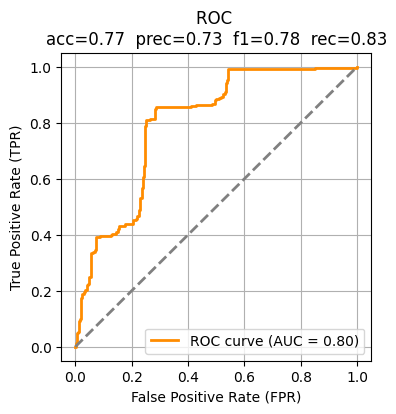

In [19]:
import matplotlib.pyplot as plt

def plot_roc_curve(metrics):
    """
    Función para graficar la curva ROC con FPR, TPR y el AUC en el título.

    Parámetros:
    - metrics: diccionario que contiene 'FPR', 'TPR' y 'AUC'.
    """
    title='ROC Curve'
    title_metrics = f'ROC \nacc={metrics['Accuracy']:.2f}  prec={metrics['Precision']:.2f}  f1={metrics['F1 Score']:.2f}  rec={metrics['Recall']:.2f}'

    plt.figure(figsize=(4, 4))
    plt.plot(metrics['FPR'], metrics['TPR'], color='darkorange', lw=2, label=f'ROC curve (AUC = {metrics["AUC"]:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # Línea diagonal de referencia
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title_metrics)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Llamada a la función
plot_roc_curve(metrics)


In [29]:
results_model['model'][0].get_booster().get_score()

{'Sex': 59.0, 'Educ': 126.0, 'MMSE': 25.0, 'GINI': 303.0}

In [43]:
count_class_0 = df_concatenado['brain_age_class'].value_counts().get(0, 0)
print(f"Cantidad de registros con brain_age_class = 0: {count_class_0}")


Cantidad de registros con brain_age_class = 0: 360


In [30]:
import numpy as np

# Inicializa una lista para almacenar los F-scores de cada modelo
f_scores_all = []

# Recorre los 200 modelos
for i in range(200):
    # Obtén los F-scores del modelo i
    f_scores = results_model['model'][i].get_booster().get_score()
    # Convierte el diccionario de F-scores en una lista y agrégala a f_scores_all
    f_scores_all.append(list(f_scores.values()))

# Transforma la lista de listas en un arreglo de numpy para facilitar cálculos
f_scores_array = np.array(f_scores_all)

# Calcula el promedio y la desviación estándar de los F-scores por clase
f_scores_avg = np.mean(f_scores_array, axis=0)
f_scores_std = np.std(f_scores_array, axis=0)

# Guarda los resultados en el formato requerido
f_scores = list(f_scores_avg)
f_score_std = list(f_scores_std)

print("f_scores =", f_scores)  # Promedio de F-score por clase
print("f_score_std =", f_score_std)  # Desviación estándar de F-score por clase


f_scores = [47.01, 106.995, 39.475, 311.47]
f_score_std = [14.943891728729838, 21.875213713241752, 7.338894671542848, 12.467922842237998]


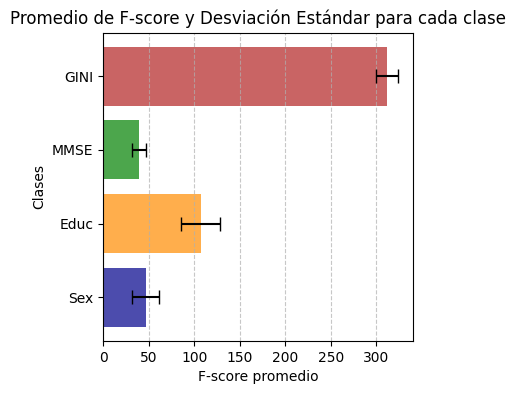

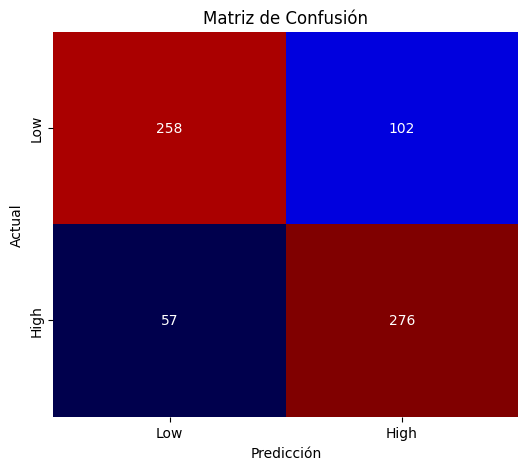

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Datos de ejemplo
#f_scores = [0.82, 0.78]  # Promedio de F-score por clase
#f_score_std = [0.04, 0.05]  # Desviación estándar de F-score por clase
classes = ['Sex', 'Educ', 'MMSE', 'GINI']

# Datos de la matriz de confusión
conf_matrix = np.array([[258, 102],
                        [57, 276]])

# 1. Gráfico de barras horizontal de F-score (Promedio y Desviación Estándar)
plt.figure(figsize=(4, 4))
plt.barh(classes, f_scores, xerr=f_score_std, capsize=5, color=['darkblue', 'darkorange', 'green', 'firebrick'], alpha=0.7)
plt.ylabel('Clases')
plt.xlabel('F-score promedio')
plt.title('Promedio de F-score y Desviación Estándar para cada clase')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

classes_ = classes = ['Low', 'High']
# 2. Matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='seismic', cbar=False,
            xticklabels=classes_, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
